# Creating the leanier regression model for our project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
import io

def perform_linear_regression(csv_file_path):
    """
    Performs linear regression on a dataset, calculates various error metrics,
    generates a vector plot of actual vs. predicted values, and saves
    the metrics to an Excel file.

    Args:
        csv_file_path (str): The path to the CSV file. All columns except the last
                             are treated as features (X), and the last column is the
                             target variable (y).
    """
    try:
        # Load the dataset
        df = pd.read_csv(csv_file_path)

        # Separate features (X) and target (y)
        X = df.iloc[:, :-1]  # All columns except the last
        y = df.iloc[:, -1]   # The last column

        # Split the data into training and testing sets (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # --- 1. Calculate Error Metrics ---
        print("--- Model Performance Metrics ---")

        # R-squared (Coefficient of Determination)
        r2 = r2_score(y_test, y_pred)
        print(f"R-squared (R2): {r2:.4f}")

        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error (MSE): {mse:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Mean Absolute Percentage Error (MAPE)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

        # Mean Squared Log Error (MSLE) - check for negative values
        if (y_test < 0).any() or (y_pred < 0).any():
            msle = 'N/A' # Not applicable for negative values
            print("MSLE: Skipped due to negative values in y_test or y_pred.")
        else:
            msle = mean_squared_log_error(y_test, y_pred)
            print(f"Mean Squared Log Error (MSLE): {msle:.4f}")

        # --- 2. Save Metrics to Excel ---
        # Create a dictionary to hold the metrics
        metrics_data = {
            'Model': ['Linear Regression'],
            'R2 Score': [r2],
            'MAE': [mae],
            'MSE': [mse],
            'RMSE': [rmse],
            'MAPE': [mape],
            'MSLE': [msle]
        }
        
        # Create a DataFrame from the dictionary
        metrics_df = pd.DataFrame(metrics_data)

        # Save the DataFrame to an Excel file
        excel_path = 'model_performance.xlsx'
        metrics_df.to_excel(excel_path, index=False)
        print(f"\nModel performance metrics saved to '{excel_path}'")

        # --- 3. Generate Bisector Line Plot ---
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

        # Plot the bisector line (y=x) for reference
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

        plt.title('Predicted vs. Actual Values with Bisector Line')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        
        # Save the plot as a vector graphic (SVG format)
        plot_path = 'predicted_vs_actual.svg'
        plt.savefig(plot_path, format='svg')
        print(f"\nVector plot saved to '{plot_path}'")
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")



--- Model Performance Metrics ---
R-squared (R2): -0.0002
Mean Absolute Error (MAE): 0.4993
Mean Squared Error (MSE): 0.2498
Root Mean Squared Error (RMSE): 0.4998
Mean Absolute Percentage Error (MAPE): 109390645376983904.00%
Mean Squared Log Error (MSLE): 0.1223

Model performance metrics saved to 'model_performance.xlsx'

Vector plot saved to 'predicted_vs_actual.svg'


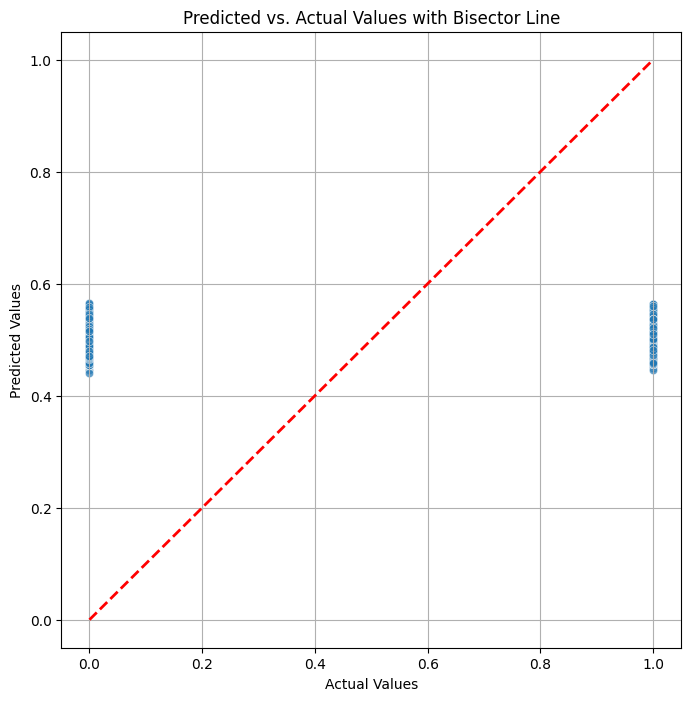

In [3]:
perform_linear_regression("../mapped_dataset_Normalized_version.csv")

# Set the model for one by one realations 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_log_error
)

def perform_linear_regression_on_multiple_files(input_folder):
    """
    Performs linear regression on all CSV files in a specified folder,
    calculates various error metrics for each, generates a vector plot,
    and saves all results into a single Excel file.

    Args:
        input_folder (str): The path to the folder containing the CSV files.
    """
    # List to store metrics from all files
    all_metrics = []

    # Check if the input folder exists
    if not os.path.exists(input_folder):
        print(f"Error: The folder '{input_folder}' was not found.")
        return

    # Loop through each file in the specified folder
    for filename in os.listdir(input_folder):
        # Only process files that end with .csv
        if filename.endswith('.csv'):
            csv_file_path = os.path.join(input_folder, filename)
            print(f"\n--- Analyzing file: {filename} ---")

            try:
                # Load the dataset
                df = pd.read_csv(csv_file_path)

                # Separate features (X) and target (y)
                # All columns except the last are features (X)
                X = df.iloc[:, :-1]
                # The last column is the target variable (y)
                y = df.iloc[:, -1]

                # Split the data into training and testing sets (80/20 split)
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42
                )

                # Initialize and train the Linear Regression model
                model = LinearRegression()
                model.fit(X_train, y_train)

                # Make predictions on the test set
                y_pred = model.predict(X_test)

                # --- Calculate Error Metrics ---
                r2 = r2_score(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mape = mean_absolute_percentage_error(y_test, y_pred) * 100

                # Mean Squared Log Error (MSLE) - check for non-positive values
                if (y_test <= 0).any() or (y_pred <= 0).any():
                    msle = np.nan  # Not applicable, using NaN
                    print("MSLE: Skipped due to non-positive values in y_test or y_pred.")
                else:
                    msle = mean_squared_log_error(y_test, y_pred)

                # Create a dictionary to hold the metrics for the current file
                metrics = {
                    'File Name': filename,
                    'R2 Score': r2,
                    'MAE': mae,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAPE (%)': mape,
                    'MSLE': msle
                }
                all_metrics.append(metrics)

                # Print the metrics to the console for this file
                for key, value in metrics.items():
                    print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")

                # --- Generate and save Bisector Line Plot ---
                plt.figure(figsize=(8, 8))
                sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

                # Plot the bisector line (y=x) for reference
                min_val = min(y_test.min(), y_pred.min())
                max_val = max(y_test.max(), y_pred.max())
                plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

                plt.title(f'Predicted vs. Actual Values for {filename}')
                plt.xlabel('Actual Values')
                plt.ylabel('Predicted Values')
                plt.grid(True)

                # Save the plot with a unique name
                plot_path = os.path.join(input_folder, f'{os.path.splitext(filename)[0]}_plot.svg')
                plt.savefig(plot_path, format='svg')
                print(f"Vector plot saved to '{plot_path}'")
                plt.close() # Close the plot to free up memory

            except Exception as e:
                print(f"An error occurred while processing '{filename}': {e}")

    # --- Save all metrics to a single Excel file ---
    if all_metrics:
        final_metrics_df = pd.DataFrame(all_metrics)
        excel_path = 'all_model_performance.xlsx'
        final_metrics_df.to_excel(excel_path, index=False)
        print(f"\n--- Process Complete ---")
        print(f"All model performance metrics saved to a single Excel file: '{excel_path}'")
    else:
        print("\nNo CSV files were found in the specified folder.")



In [5]:
perform_linear_regression_on_multiple_files("../new_csv_files/")


--- Analyzing file: file_1.csv ---
MSLE: Skipped due to non-positive values in y_test or y_pred.
File Name: file_1.csv
R2 Score: -0.0015
MAE: 0.5001
MSE: 0.2501
RMSE: 0.5001
MAPE (%): 109440179835349568.0000
MSLE: nan
Vector plot saved to '../new_csv_files/file_1_plot.svg'

--- Analyzing file: file_10.csv ---
MSLE: Skipped due to non-positive values in y_test or y_pred.
File Name: file_10.csv
R2 Score: -0.0009
MAE: 0.4999
MSE: 0.2499
RMSE: 0.4999
MAPE (%): 109429135655271648.0000
MSLE: nan
Vector plot saved to '../new_csv_files/file_10_plot.svg'

--- Analyzing file: file_11.csv ---
MSLE: Skipped due to non-positive values in y_test or y_pred.
File Name: file_11.csv
R2 Score: -0.0011
MAE: 0.5000
MSE: 0.2500
RMSE: 0.5000
MAPE (%): 109419499176542864.0000
MSLE: nan
Vector plot saved to '../new_csv_files/file_11_plot.svg'

--- Analyzing file: file_12.csv ---
MSLE: Skipped due to non-positive values in y_test or y_pred.
File Name: file_12.csv
R2 Score: -0.0019
MAE: 0.5001
MSE: 0.2502
RMSE: